In [1]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing Necessary Packages And Libraries 

In [2]:
import os
import cv2
import pandas as pd
import numpy  as np
import tensorflow as tf
import pytesseract as pt
import plotly.express as px
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet
from glob import glob
from skimage import io
from shutil import copy
from tensorflow.keras.models import Model
from  tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense,Dropout,Flatten,Input
from tensorflow.keras.preprocessing.image import load_img,img_to_array


# Generating CSV file from our xml File

In [3]:
# Remove the Comments If you Already have CSV file containing Filepath,X1,X2,Y1,Y2 labels


path = glob('images/*.xml')
labels_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[])
for filename in path:

    info = xet.parse(filename)
    root = info.getroot()
    member_object = root.find('object')
    labels_info = member_object.find('bndbox')
    xmin = int(labels_info.find('xmin').text)
    xmax = int(labels_info.find('xmax').text)
    ymin = int(labels_info.find('ymin').text)
    ymax = int(labels_info.find('ymax').text)

    labels_dict['filepath'].append(filename)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)

# Reading The CSV file


In [4]:
df = pd.read_csv('labels.csv')
df.head()

,filepath,xmin,xmax,ymin,ymax
0,/content/drive/MyDrive/images/Cars108.xml,158,277,216,248
1,/content/drive/MyDrive/images/Cars1.xml,134,262,128,160
2,/content/drive/MyDrive/images/Cars0.xml,226,419,125,173
3,/content/drive/MyDrive/images/Cars101.xml,167,240,202,220
4,/content/drive/MyDrive/images/Cars107.xml,141,311,113,164


In [5]:
from tables import file
filename = df['filepath'][0]
def getFilename(filename):
  filename_image = xet.parse(filename).getroot().find('filename').text
  filepath_image = os.path.join('images',filename_image)
  return filepath_image
getFilename(filename)


'/content/drive/MyDrive/images/Cars108.png'

#Get Random File from Dataset

In [6]:
image_path = list(df['filepath'].apply(getFilename))
image_path[:10]

['/content/drive/MyDrive/images/Cars108.png',
 '/content/drive/MyDrive/images/Cars1.png',
 '/content/drive/MyDrive/images/Cars0.png',
 '/content/drive/MyDrive/images/Cars101.png',
 '/content/drive/MyDrive/images/Cars107.png',
 '/content/drive/MyDrive/images/Cars104.png',
 '/content/drive/MyDrive/images/Cars106.png',
 '/content/drive/MyDrive/images/Cars103.png',
 '/content/drive/MyDrive/images/Cars10.png',
 '/content/drive/MyDrive/images/Cars105.png']

# Checking One of the file from Our Dataset with Bounding Box

In [7]:
!pip install pytesseract==0.3.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: pytesseract
    Found existing installation: pytesseract 0.3.10
    Uninstalling pytesseract-0.3.10:
      Successfully uninstalled pytesseract-0.3.10


In [8]:
# file_path = "/content/drive/MyDrive/car.jpg" #path of our image N2.jpeg
# img = cv2.imread(file_path) #read the image
# # xmin-1804/ymin-1734/xmax-2493/ymax-1882 
# img = io.imread(file_path) #Read the image
# fig = px.imshow(img)
# fig.update_layout(width=500, height=400, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure 8 - N2.jpeg with bounding box')
# fig.add_shape(type='rect',x0=247, x1=375, y0=185, y1=223, xref='x', yref='y',line_color='cyan')

In [9]:
#Targeting all our values in array selecting all columns
labels = df.iloc[:,1:].values
data = []
output = []
for ind in range(len(image_path)):
    image = image_path[ind]
    img_arr = cv2.imread(image)
    h,w,d = img_arr.shape
    # Prepprocesing
    load_image = load_img(image,target_size=(331,331))
    load_image_arr = img_to_array(load_image)
    norm_load_image_arr = load_image_arr/255.0 # Normalization
    # Normalization to labels
    xmin,xmax,ymin,ymax = labels[ind]
    nxmin,nxmax = xmin/w,xmax/w
    nymin,nymax = ymin/h,ymax/h
    label_norm = (nxmin,nxmax,nymin,nymax) # Normalized output
    # Append
    data.append(norm_load_image_arr)
    output.append(label_norm)

In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Splitting  Train and test dataset

In [11]:
#converting Data into Array
X  = np.array(data,dtype = np.float32)
y  = np.array(output,dtype = np.float32)

In [12]:
#using Sklearn split the data into training and testing set
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape #checking the shape

((346, 331, 331, 3), (87, 331, 331, 3), (346, 4), (87, 4))

# Building the model



In [13]:
from tensorflow.keras.applications import ResNet50V2,ResNet152V2,EfficientNetB0,VGG19,MobileNet,MobileNetV2,DenseNet201,DenseNet169,NASNetLarge

In [14]:



# MobileNet =ResNet152V2(
#     include_top=False,
#     weights="imagenet",
#     input_shape=(224,224,3),
#     pooling=None,
#     classes=1000,
#     classifier_activation="softmax",
# )


# MobileNet = EfficientNetB0(
#     include_top=False,
#     weights="imagenet",
#     input_shape=(224,224,3),
#     pooling=None,
#     classes=1000
   
# )
 
# MobileNet =  VGG19(
#     include_top=False,
#     weights="imagenet",
#     input_shape=(224,224,3),
#     pooling=None,
#     classes=1000
# )

# MobileNet = DenseNet169(
#     include_top=False,
#     weights="imagenet",
#     input_shape=(224,224,3),
#     pooling=None,
#     classes=1000
# )

MobileNet  = NASNetLarge(
    input_shape=(331,331,3),
    include_top=False,
    weights="imagenet",
    pooling=max
     
)

model = MobileNet.output
model = Flatten()(model)
model = Dense(100,activation='relu')(model)
model = Dense(50,activation='relu')(model)
model = Dense(4,activation='sigmoid')(model)

model = Model(inputs=MobileNet.input,outputs=model)

343610240/343610240 [==============================] - 2s 0us/step


# Compiling the model

In [15]:
Callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [16]:
model.compile(loss='mean_squared_logarithmic_error',optimizer=tf.keras.optimizers.Adam(0.0001),metrics=['accuracy'])
#model.summary()

In [17]:

model_history = model.fit(x_train,y_train,steps_per_epoch=346//10,batch_size=10,epochs=40,validation_data=(x_test,y_test),validation_steps= 87//10)

Epoch 1/40
34/34 [==============================] - 271s 1s/step - loss: 0.0233 - accuracy: 0.5059 - val_loss: 0.0127 - val_accuracy: 0.5750
Epoch 2/40
34/34 [==============================] - 40s 1s/step - loss: 0.0086 - accuracy: 0.6458 - val_loss: 0.0125 - val_accuracy: 0.6875
Epoch 3/40
34/34 [==============================] - 37s 1s/step - loss: 0.0035 - accuracy: 0.7262 - val_loss: 0.0087 - val_accuracy: 0.7125
Epoch 4/40
34/34 [==============================] - 37s 1s/step - loss: 0.0019 - accuracy: 0.8482 - val_loss: 0.0080 - val_accuracy: 0.7000
Epoch 5/40
34/34 [==============================] - 37s 1s/step - loss: 0.0013 - accuracy: 0.8958 - val_loss: 0.0078 - val_accuracy: 0.7250
Epoch 6/40
34/34 [==============================] - 38s 1s/step - loss: 0.0011 - accuracy: 0.9077 - val_loss: 0.0079 - val_accuracy: 0.6875
Epoch 7/40
34/34 [==============================] - 37s 1s/step - loss: 0.0011 - accuracy: 0.9107 - val_loss: 0.0086 - val_accuracy: 0.6875
Epoch 8/40
34/34 [=

Text(0.5, 1.0, 'Accuracy with epochs')

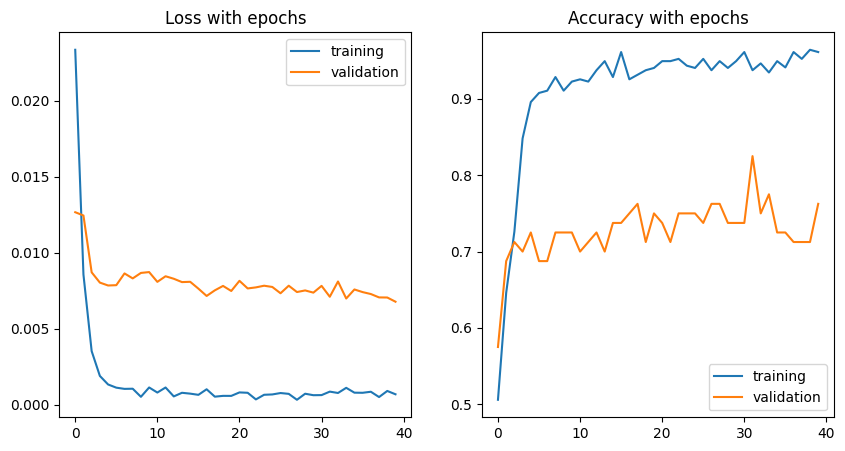

In [18]:
fig,ax=plt.subplots(1,2,figsize=(10,5))

ax[0].plot(model_history.history['loss'],label='training')
ax[0].plot(model_history.history['val_loss'],label='validation')
ax[0].legend()
ax[0].set_title('Loss with epochs')

ax[1].plot(model_history.history['accuracy'],label='training')
ax[1].plot(model_history.history['val_accuracy'],label='validation')
ax[1].legend()
ax[1].set_title('Accuracy with epochs')

# epochs=40
# print("Calculating the accuracy")
# acc = model_history.history['accuracy']
# val_acc = model_history.history['val_accuracy']
# print("Calculating the loss")
# loss = model_history.history['loss']
# val_loss = model_history.history['val_loss']

# epochs_range = range(epochs)
# print("The results are being visualized")
# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')
# plt.subplot(1, 2, 2)

# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [19]:
model.evaluate(x_test,y_test,batch_size=12)

8/8 [==============================] - 4s 380ms/step - loss: 0.0065 - accuracy: 0.7701


[0.006521238479763269, 0.7701149582862854]

# Saving And Loading the Model


In [20]:
model.save('licence_plate_detection.h5')

In [21]:
model = tf.keras.models.load_model('licence_plate_detection.h5')


# Creating the function to Load testing Image and test it with our model to  check the prediction


1/1 [==============================] - 0s 51ms/step
(75, 82) (163, 110)



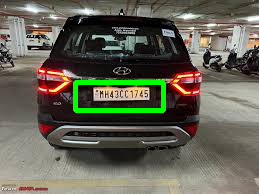

In [25]:
path = 'images.jpg'

#defining the function for detection
def object_detection(path):
  #Read the Image
  image = load_img(path)
   #converting the image into numpy array of 8 bit (0-255)
  image = np.array(image,dtype=np.uint8)
  image1 = load_img(path,target_size=(331,331))

  image_arr_224 = img_to_array(image1) / 255.0 #convert to  array and normalize it
  h,w,d = image.shape #getting the image property
  test_arr = image_arr_224.reshape(1,331,331,3) #reshaping our testing image

  coordinates = model.predict(test_arr) #predciting the model

   # Denormalize the values
  denorm = np.array([w,w,h,h])
  coordinates = coordinates * denorm
  coordinates = coordinates.astype(np.int32)
    
    # Draw bounding on top the image
  xmin, xmax,ymin,ymax = coordinates[0]
  pt1 =(xmin,ymin)
  pt2 =(xmax,ymax)
  print(pt1, pt2)
  cv2.rectangle(image,pt1,pt2,(0,255,0),3)
  return image, coordinates

image, cods = object_detection(path)

fig = px.imshow(image)
fig.update_layout(width=700, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure 14')

